In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('dataset.csv')
df = dataset.copy()

C:\Users\ucspa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [7]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)


In [10]:
df['agency'].value_counts()
# date format - mm/dd/yyyy
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [11]:
#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

In [12]:
df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [13]:
#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

In [14]:
#dataset after deleting the above columns
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [15]:
# 298 locations, 34 states

In [16]:
#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'

In [17]:
df['type'] = a
df['type'].value_counts()

Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

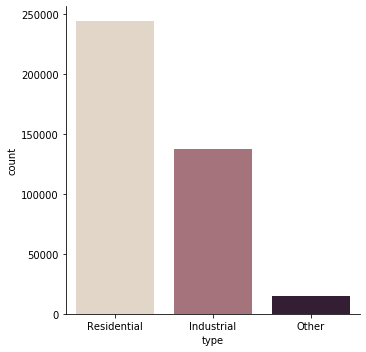

In [18]:
######################################### do add threshold lines
#how many observations belong to each location
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

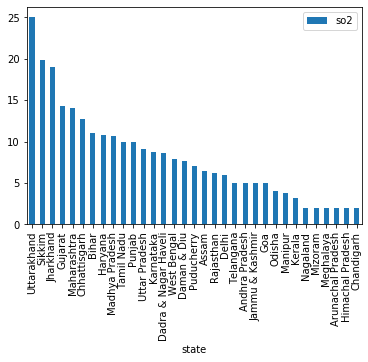

In [19]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

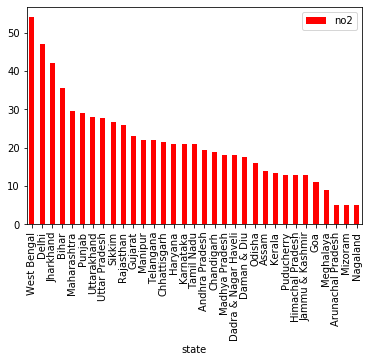

In [20]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

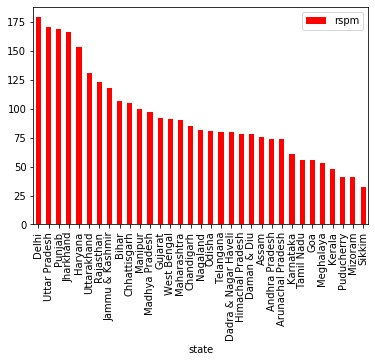

In [21]:
# rspm = PM10
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')


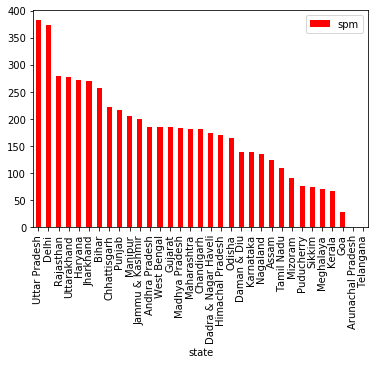

In [22]:
# spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

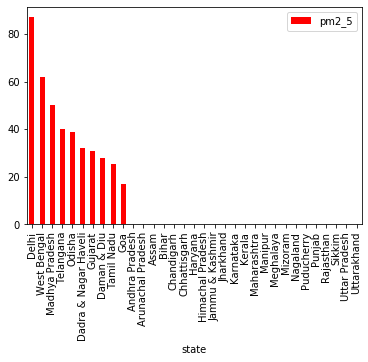

In [23]:
# pm2_5
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')

C:\Users\ucspa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


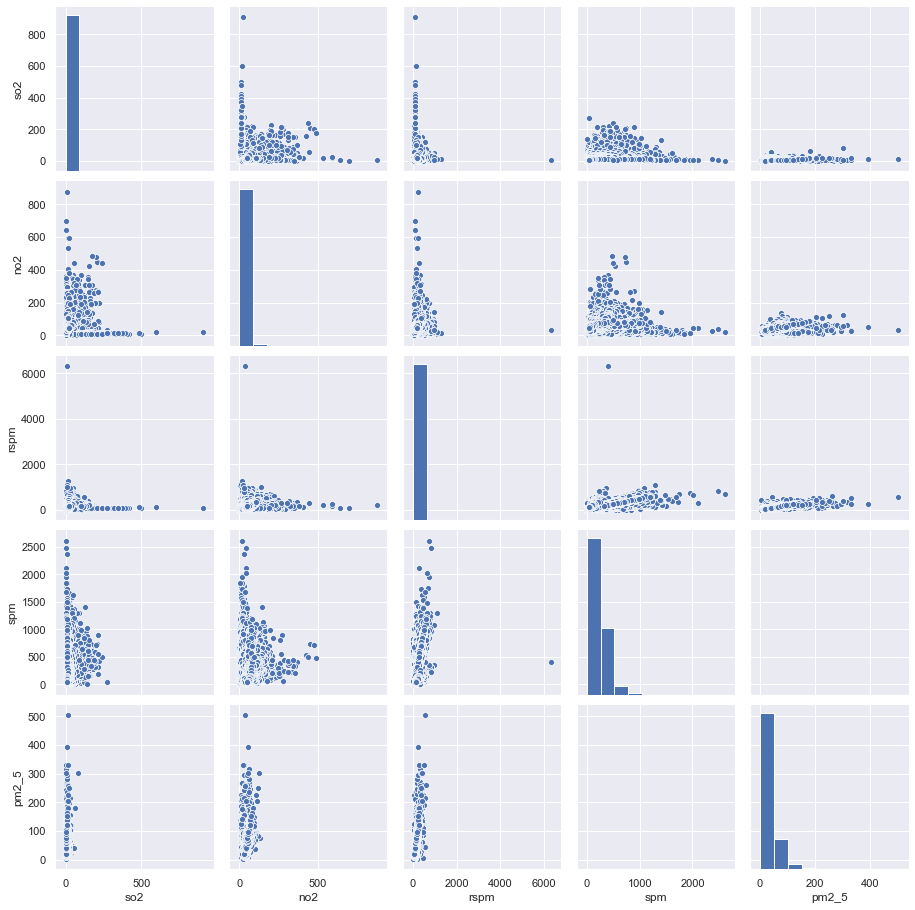

In [24]:
#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

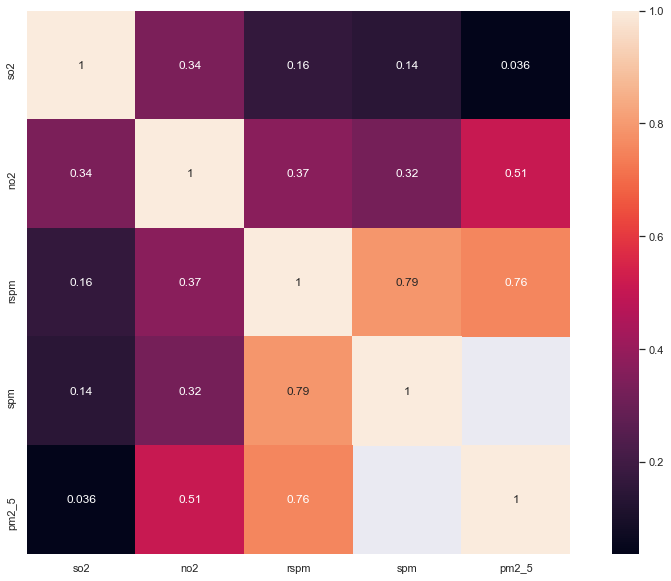

In [36]:
#Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

In [25]:
# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

In [26]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


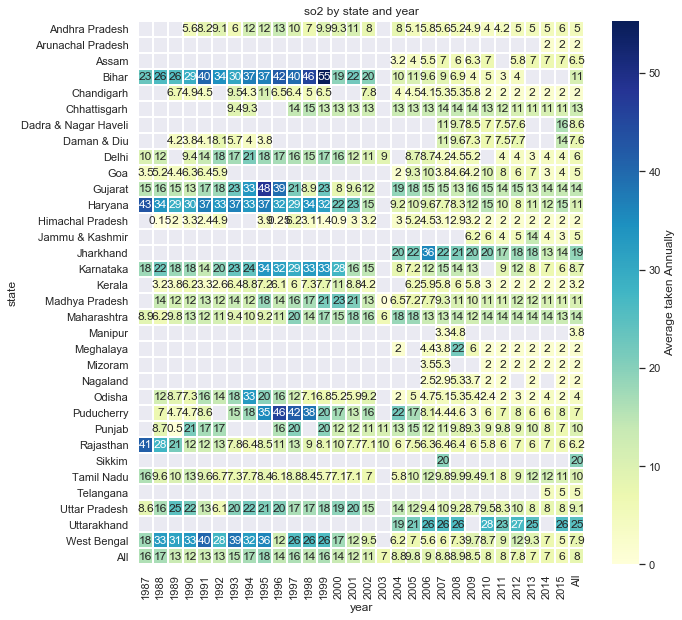

In [27]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

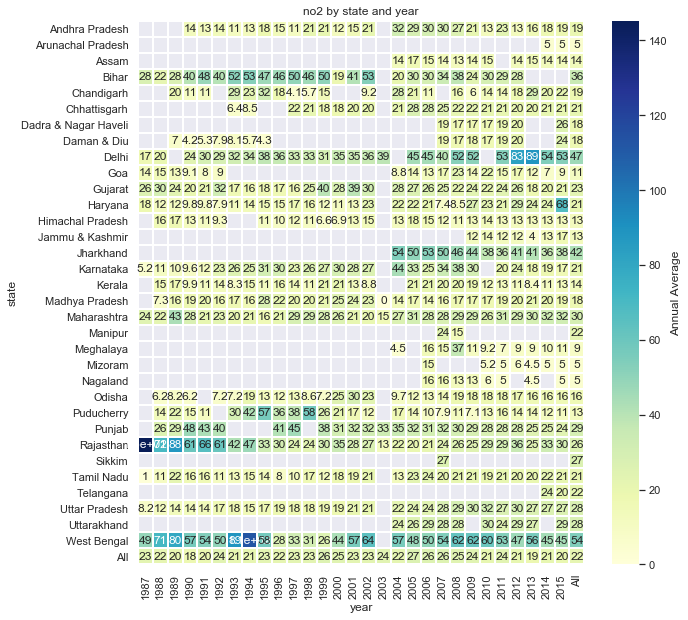

In [28]:
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

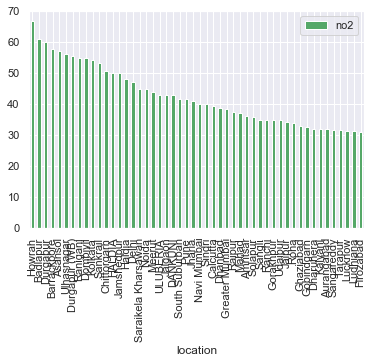

In [29]:

# bar plot of no2 vs location - desc order - first 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g')

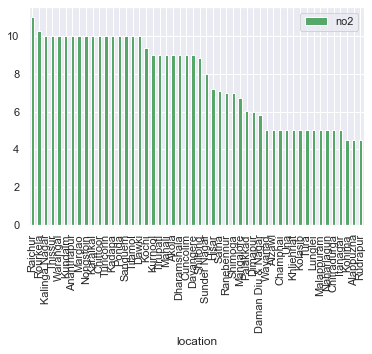

In [30]:
# bar plot of no2 vs location - desc order - last 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')

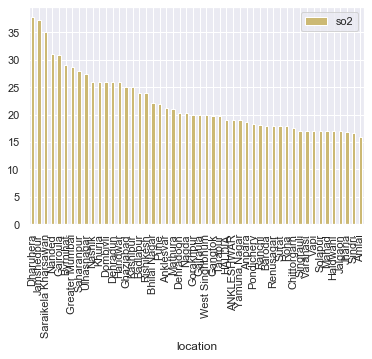

In [31]:
# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y')

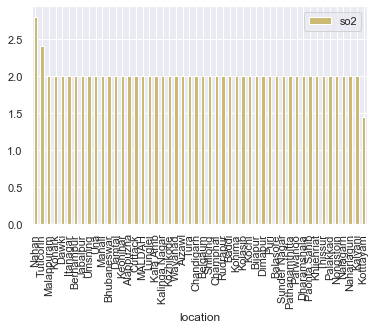

In [32]:
# bar plot of no2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y')

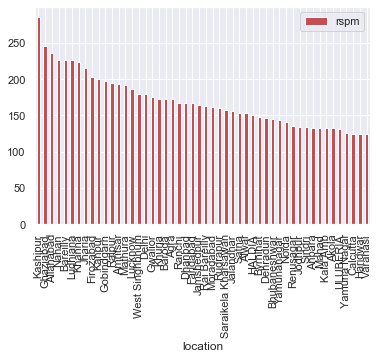

In [33]:
# rspm = PM10 - location wise - first 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')

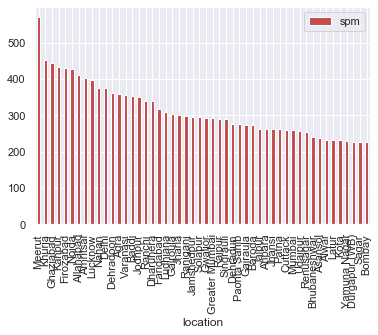

In [34]:
# spm = PM10 - location wise - first 50
df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'r')

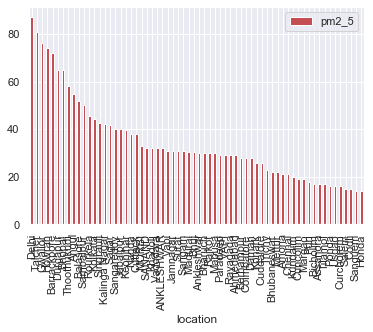

In [35]:
# pm2_5 vs location - all non null values
df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')

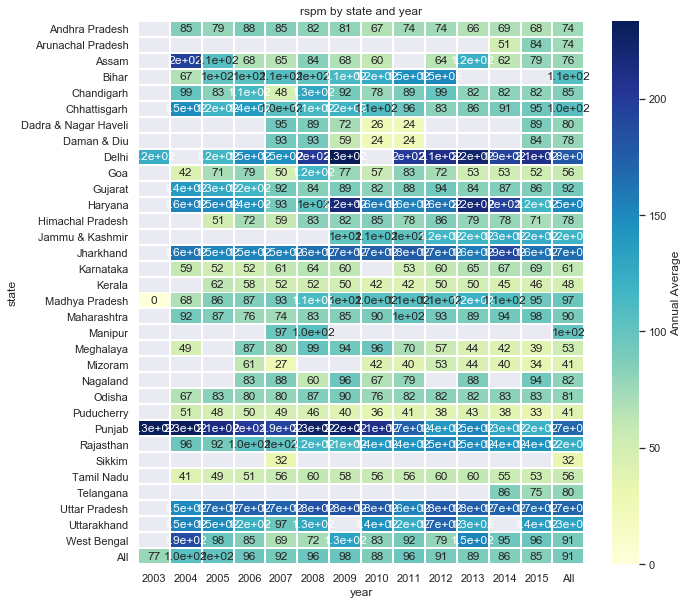

In [36]:
# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(df.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

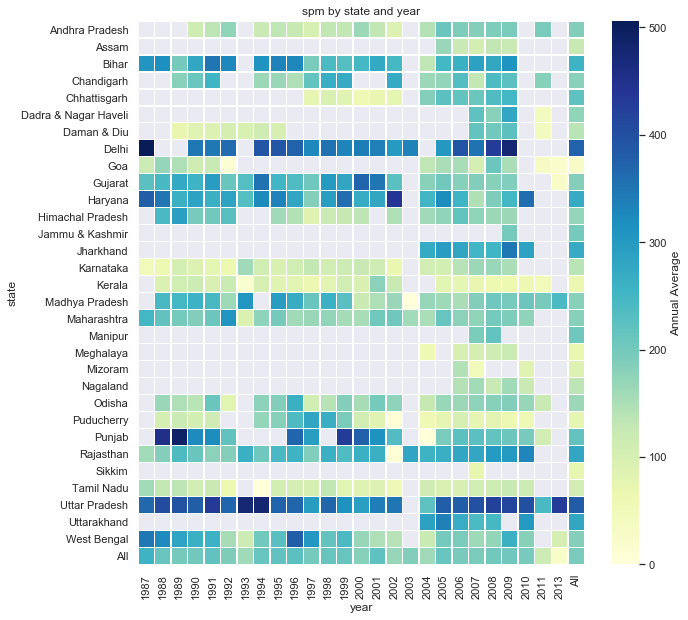

In [37]:
# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})